In [1]:
import pandas as pd
from sklearn import linear_model
import numpy as np
import math

#imports data
df = pd.read_csv('test_scores.csv')
df

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


In [3]:
def gradient_dec(x,y):
    '''Uses gradient descent to find best fitting line'''
    
    # test m and b are beginging at 0
    m_test = 0
    b_test = 0
    
    # number that is tested to get best result
    learning_rate = 0.0002
    n = len(x)
    error = 1
    pre_error = 0
    it = 0
    # adjusting until tolerence is within 1e-09
    
    while math.isclose(error, pre_error, rel_tol=1e-20) == False:

        pre_error = error
        y_predicted = (m_test * x) + b_test             # creates an array of all predicted y values
        error = (1/n) * sum([err**2 for err in (y-y_predicted)])       # mse calculation
        m_pd = (2/n) * sum(-x * (y - y_predicted))      # partial derivative of mse with respect to m
        b_pd = (2/n) * sum(-(y - y_predicted))          # partial derivative of mse with respect to b
        m_test = m_test - (learning_rate * m_pd)        # moves towards lowest point at smaller rates as m_pd approaches 0
        b_test = b_test - (learning_rate * b_pd)        # moves towards lowest point at smaller rates as b_pd approaches 0
        it += 1
    print ("m {}, b {}, error {}, iteration {}".format(m_test,b_test,error, it))

gradient_dec(df.math,df.cs)

m 1.0177381667350405, b 1.9150826165722297, error 31.604511334602297, iteration 415534


In [8]:
reg = linear_model.LinearRegression()
reg.fit(df[['math']],df['cs'])
print('y = {}x + {}'.format(round(reg.coef_[0],4), round(reg.intercept_,3)))

y = 1.0177x + 1.915


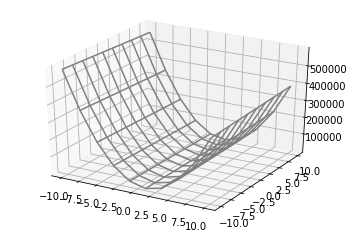

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection="3d")

def e_function(m, b):
    error = 0
    for i in range(len(df.math)):
        error += ((df.cs[i]- (m*df.math[i] + b) )**2)
    error = error / len(df.cs)
    return error

m = np.linspace(-10,10, 10)
b = np.linspace(-10,10, 10)


m, b = np.meshgrid(m, b)
e = e_function(m, b)

ax.plot_wireframe(m, b, e, color='grey', zorder=1)

1.02x + 1.92
